In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IU Sem5/Stastical Method/Project/Airline-Dataset (1).csv')
df

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,58454,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12/11/2022,HAA,Gareth Mugford,Cancelled
98615,22028,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Kasey Benedict,Cancelled
98616,61732,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,9/10/2022,ABC,Darrin Lucken,On Time
98617,19819,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,GGN,Gayle Lievesley,Cancelled


Part 1:



DESCRIPTIVE STASTISTICS AND VISUALIZATION

+ Summarize passenger demographics: Calculate age distribution, gender proportions, and frequency of different nationalities.
+ Understand travel patterns: Describe most frequent airports, continents of departure and arrival, and common routes.
+ Identify peak travel times: Explore date of arrival patterns to reveal busiest periods.

In [ ]:
#Calculate age distribution
# Create a new column to represent the age group
df['age_group'] = pd.cut(df['Age'], bins=[0, 18,45, 60, float('inf')], labels=['below 18', '18-45','45-60' ,'60 and higher'])
# Calculate the age distribution
age_distribution = df['age_group'].value_counts()
print(age_distribution)

60 and higher    32772
18-45            29590
below 18         19646
45-60            16611
Name: age_group, dtype: int64


Mean age: 45.50402052342855
Mode age: 29
Median age: 46.0


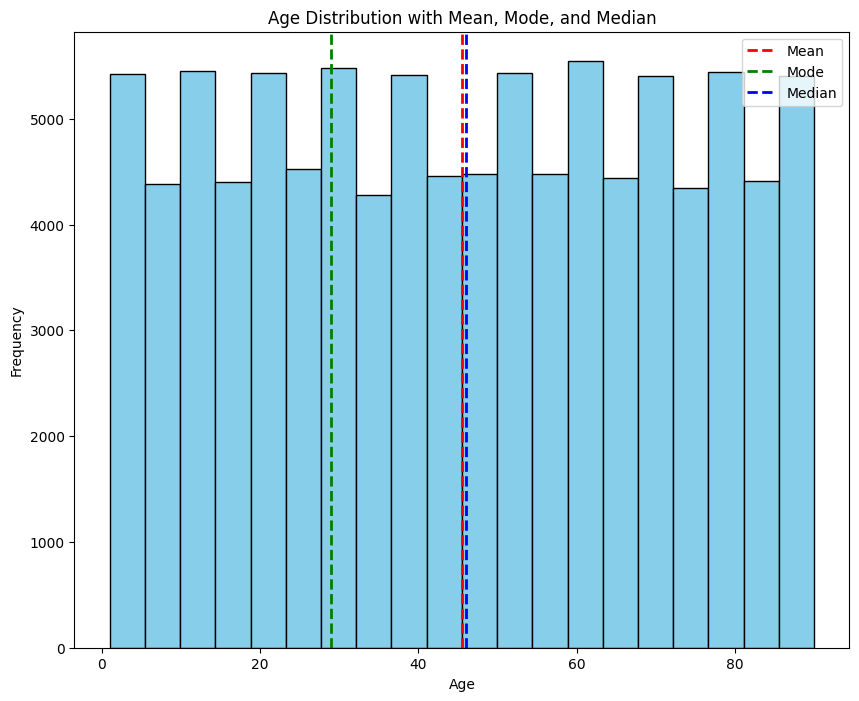

In [ ]:
mean_age = df['Age'].mean()
mode_age = df['Age'].mode()[0]  # mode() returns a Series, so we use [0] to get the first mode
median_age = df['Age'].median()
print("Mean age:", mean_age)
print("Mode age:", mode_age)
print("Median age:", median_age)
plt.figure(figsize=(10, 8))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(mean_age, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mode_age, color='g', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(median_age, color='b', linestyle='dashed', linewidth=2, label='Median')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution with Mean, Mode, and Median')
plt.legend()
plt.show()

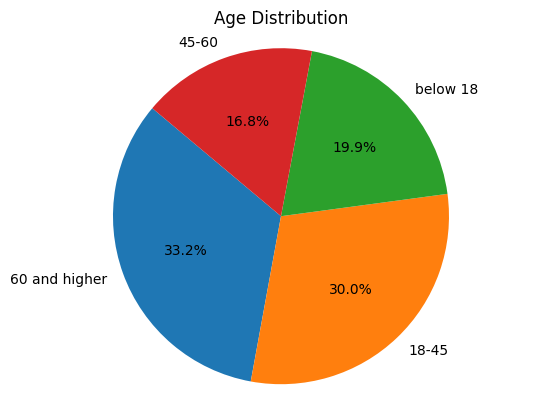

In [ ]:
plt.figure()
plt.pie(age_distribution, labels=age_distribution.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Age Distribution')
# Display the pie chart
plt.show()

Male      49598
Female    49021
Name: Gender, dtype: int64


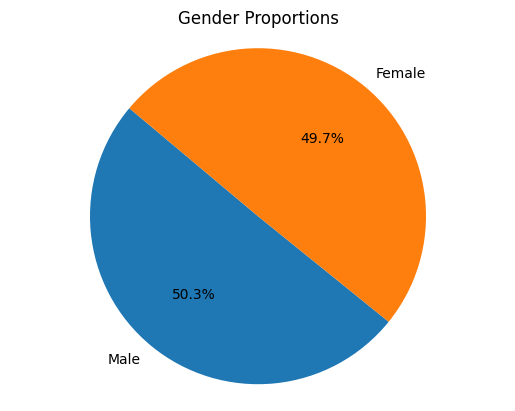

In [ ]:
# Calculate the gender proportions
gender_proportions = df['Gender'].value_counts(normalize=True) * 100
# Create a pie chart
plt.figure()
plt.pie(gender_proportions, labels=gender_proportions.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender Proportions')
gender_proportions = df['Gender'].value_counts()
print(gender_proportions)
# Display the pie chart
plt.show()

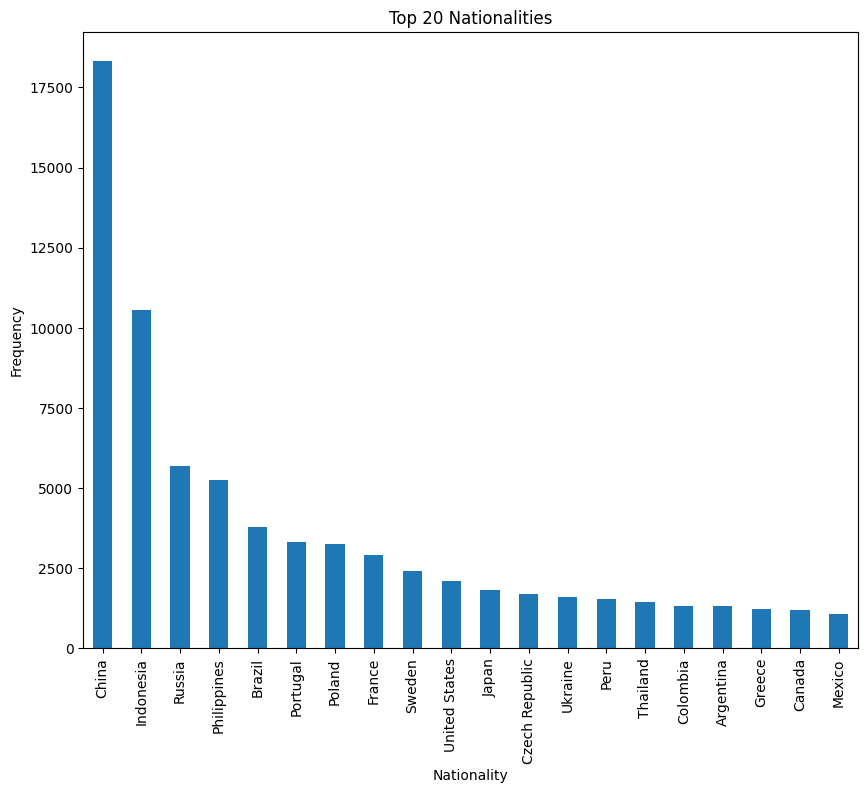

In [ ]:
# Calculate the frequency of different nationalities
top_nationalities = df['Nationality'].value_counts().head(20)
# Create a bar plot for the top 20 nationalities
plt.figure(figsize=(10, 8))
top_nationalities.plot(kind='bar')
plt.title('Top 20 Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Frequency')
plt.show()

San Pedro Airport                43
Santa Maria Airport              38
Böblingen Flugfeld               36
Santa Ana Airport                35
San Fernando Airport             31
Mae Hong Son Airport             29
Capital City Airport             28
Cochrane Airport                 28
Santa Rosa Airport               28
Bathurst Airport                 27
Mount Pleasant Airport           27
Nogales International Airport    27
Herrera Airport                  27
Punta Colorada Airport           27
Lake County Airport              27
Marion Municipal Airport         27
La Florida Airport               27
Yangzhou Taizhou Airport         27
Grant County Airport             26
Lawrence Municipal Airport       26
Name: Airport Name, dtype: int64


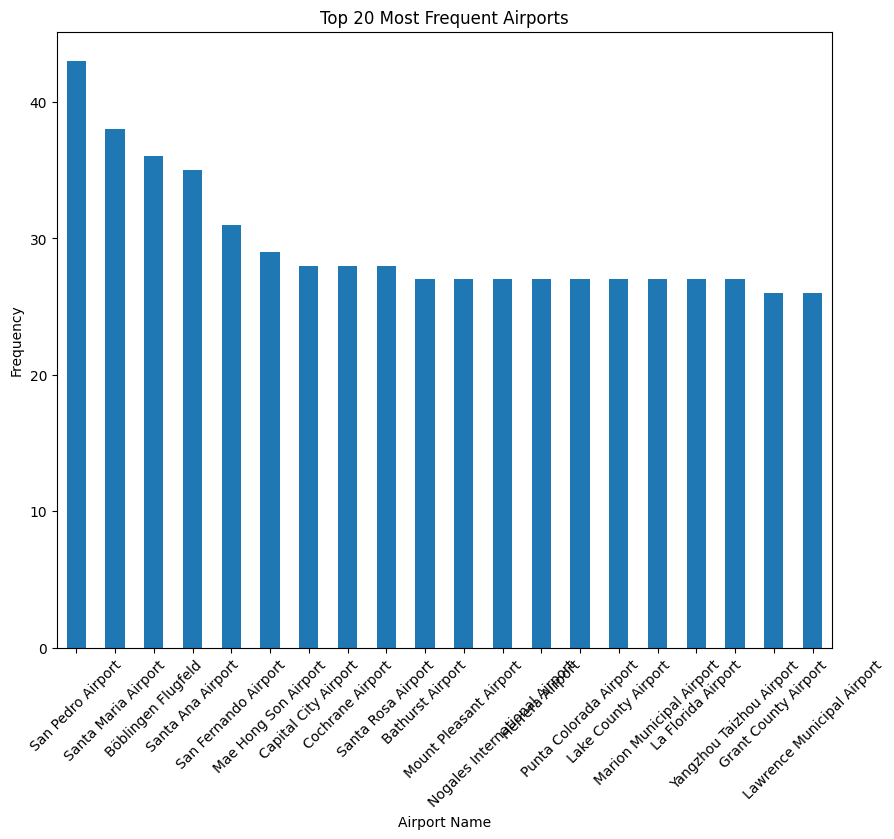

In [ ]:
# Calculate the frequency of different airports
top_airports = df['Airport Name'].value_counts().head(20)
print(top_airports)
# Create a bar plot for the top 20 airports
plt.figure(figsize=(10, 8))
top_airports.plot(kind='bar')
plt.title('Top 20 Most Frequent Airports')
plt.xlabel('Airport Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Part 3: Hypothesis Testing:

+ Compare travel patterns between genders or age groups: Test for differences in the proportion of cancelled flights between countries using chi-squares test.
+ Using t-test to determine whether difference in mean ages between Japan and China

In [ ]:
print(df.columns.values)

['Passenger ID' 'First Name' 'Last Name' 'Gender' 'Age' 'Nationality'
 'Airport Name' 'Airport Country Code' 'Country Name' 'Airport Continent'
 'Continents' 'Departure Date' 'Arrival Airport' 'Pilot Name'
 'Flight Status']


In [ ]:
# Checking for outliers
df.describe()

,Passenger ID,Age
count,98619.000000,98619.000000
mean,55168.689522,45.504021
std,25985.443696,25.929849
min,10000.000000,1.000000
25%,32608.000000,23.000000
50%,55338.000000,46.000000
75%,77695.000000,68.000000
max,99999.000000,90.000000


In [ ]:
age_column = df['Age']
# Z-scores method for the "Age" column
z_scores_age = np.abs((age_column - age_column.mean()) / age_column.std())
outliers_z_age = df[z_scores_age > 3]  # Adjust threshold as needed
# IQR method for the "age" column
Q1_age = age_column.quantile(0.25)
Q3_age = age_column.quantile(0.75)
IQR_age = Q3_age - Q1_age
outliers_iqr_age = df[((age_column < (Q1_age - 1.5 * IQR_age)) | (age_column > (Q3_age + 1.5 * IQR_age)))]

In [ ]:
print(z_scores_age)

0        0.636177
1        0.636177
2        0.829005
3        0.983268
4        0.945012
           ...   
98614    1.523186
98615    1.022143
98616    0.751874
98617    0.443659
98618    1.369234
Name: Age, Length: 98619, dtype: float64


In [ ]:
print(Q1_age)
print(Q3_age)
print(IQR_age)

23.0
68.0
45.0


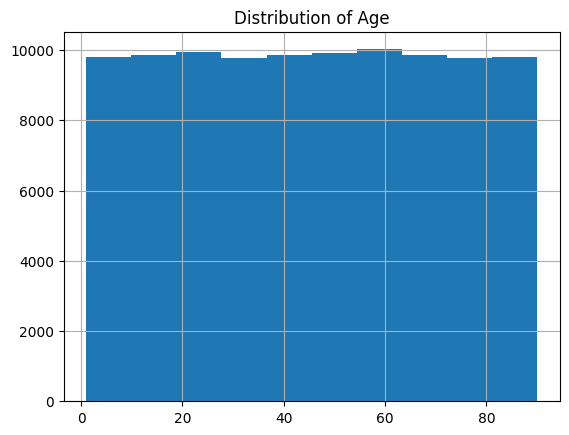

In [ ]:
# Visualization for the "Age" column
age_column.hist()
plt.title("Distribution of Age")
plt.show()

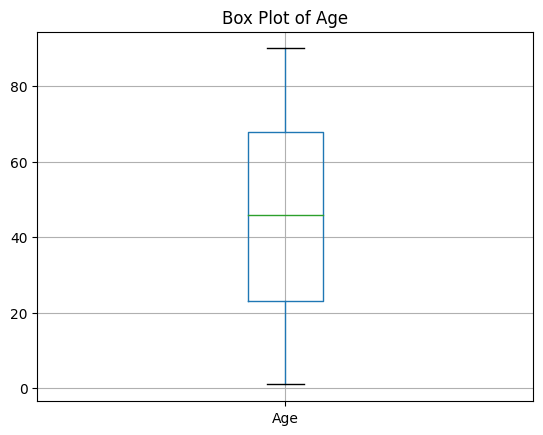

In [ ]:
df.boxplot(column='Age')
plt.title("Box Plot of Age")
plt.show()
# --> No outliers

In [ ]:
table = pd.crosstab(df["Country Name"], df["Flight Status"], margins=True)
# Perform chi-square test
chi2, pval, dof, expected = chi2_contingency(table)
# Print results
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {pval}")
# Interpret results
if pval < 0.05:
    print("There is a statistically significant difference in the proportion of cancelled flights between countries.")
else:
    print("There is no statistically significant difference in the proportion of cancelled flights between countries.")

Chi-square statistic: 414.5802093241695
p-value: 1.0
There is no statistically significant difference in the proportion of cancelled flights between countries.


In [ ]:
age = df['Age'].values
nationality = df['Nationality'].values
# Filter data for passengers from Japan and China
japan_ages = age[nationality == 'Japan']
china_ages = age[nationality == 'China']
# Perform a two-sample t-test to compare means
t_test_result = stats.ttest_ind(japan_ages, china_ages)
# Additionally, print the p-value for further context
print("p-value:", t_test_result.pvalue)
# Print the results
print("T-test results:")
print("Test statistic:", t_test_result.statistic)
print("p-value:", t_test_result.pvalue)
if abs(t_test_result.statistic) > t_test_result.pvalue:
    print("Reject the null hypothesis: There is a significant difference in mean ages.")
else:
    print("Accept the null hypothesis: Not enough evidence to conclude a difference.")

p-value: 0.5801104567621671
T-test results:
Test statistic: 0.55323236172123
p-value: 0.5801104567621671
Accept the null hypothesis: Not enough evidence to conclude a difference.


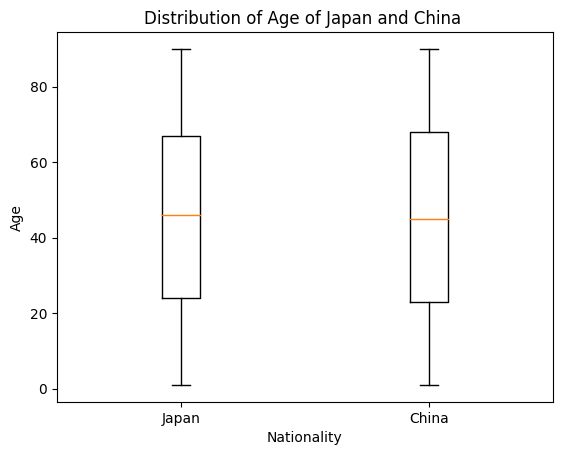

In [ ]:
plt.figure()
plt.boxplot([japan_ages, china_ages], labels=['Japan', 'China'])
plt.title("Distribution of Age of Japan and China ")
plt.xlabel("Nationality")
plt.ylabel("Age")
plt.show()